<img src="./logo_UTN.svg" align="right" width="150" /> 



# Trabajo de Laboratorio Nº 1

## Teoría de los Circuitos 2

#### Juan Camilo Mariscal Gutierrez
#### David Ezequiel Galvan

## Consignas

Objetivos:
Consolidar los conceptos de teoría moderna mediante la implementación circuital.
Simular e implementar el filtro con componentes activos de precisión.
Medir las partes de la función transferencia para frecuencias menores a 100 kHz.

Descripción

El trabajo práctico consiste en el diseño, análisis, medición y discusión de un filtro activo.

El filro que se va a diseñar sera un circuito pasa bajos Bessell con las siguientes especificaciones de diseño.

<img src="./Bessel.png"  /> 



El integrado que se va a utilizar pata este trabajo Practico sera el UAF42 
a continuacion se vera una imagen interna del integrado.

<img src="./UAF42.png"  /> 

## Desarrollo y calculo de los componentes

Usaremos la entrada In3 para hacer el desarrolo y el calculo de las resistencias. 

<img src="./TPLAB002.jpg" align="left" width="475"/> 
<img src="./TPLAB003.jpg" align="right" width="475"/>

<img src="./TPLAB004.jpg" align="left" width="475"/> 
<img src="./TPLAB005.jpg" align="right" width="475"/>

## Desarrollo numerico y simbolico en Python

<IPython.core.display.Math object>

#### Transferencia factorizada

<IPython.core.display.Math object>

#### Transferencia factorizada y parametrizada

<IPython.core.display.Math object>

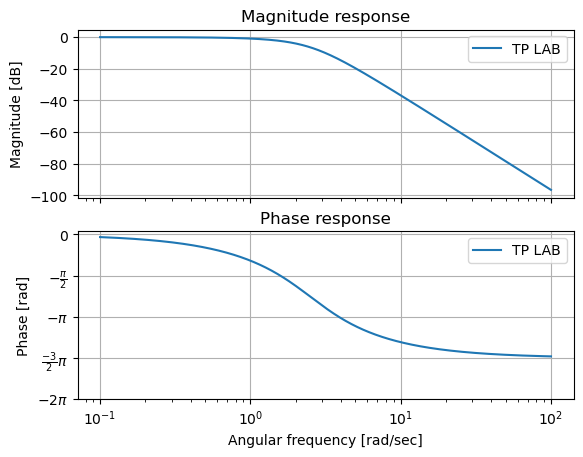

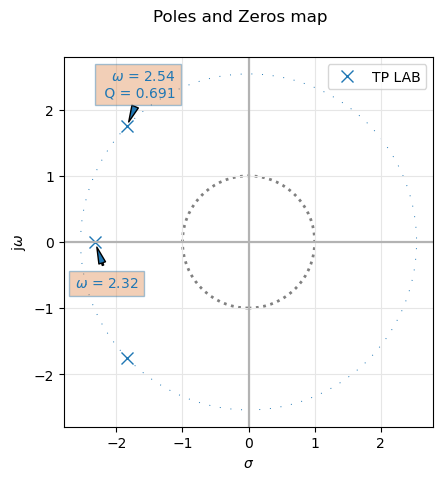

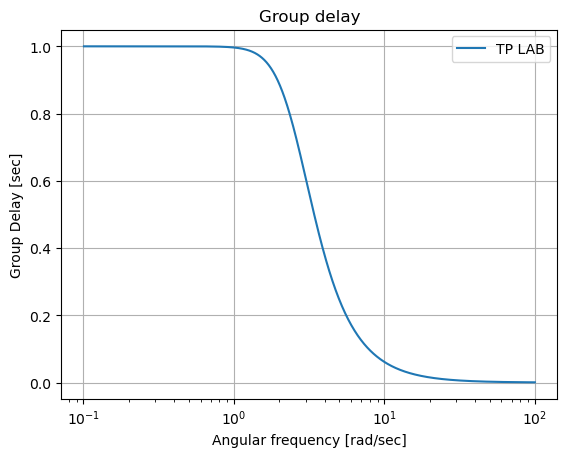

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.signal as sig
from IPython.display import display, Markdown



#fig_font_size = 12

from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle


# import splane

num = np.array([15])
den = np.array([1,6,15,15])


pretty_print_lti(num,den)

analyze_sys( sig.TransferFunction(num, den), 'TP LAB' )
# z,p,k =signal.tf2zpk(num,den)
# j = signal.tf2sos(num,den)

# particiono en SOS's para la implementación
sos_pb = tf2sos_analog(num, den)

# ajusto posibles problemas numericos (negativos y valores despreciables)
# asumimos siempre transferencias normalizadas.
sos_pb[sos_pb < 1e-6] = 0.0

print_subtitle('Transferencia factorizada')

# visualizamos la transferencia factorizada
pretty_print_SOS(sos_pb)

print_subtitle('Transferencia factorizada y parametrizada')

# visualizamos la transferencia factorizada y parametrizada
pretty_print_SOS(sos_pb, mode='omegayq')


Podemos ver que en el desarrolo de los calulos nos dan los mismo que en desarrollo numero y simbolico.
se puede verificar que efectivamente nos da un filtro pasabajos de orden 3 con 2 polos complejos conjugador y uno sobre el eje,
los cuales en el grafico de fase muestran 0 para continua y -3pi/2



## sumulacion circuital con LTspace

Aca usaremos los valores de los componente que fueron calculados.

<img src="./circuito.png" /> 

En esta simulacion se usaron operacionales ideales.

<img src="./tranferencia.png"  /> 

Como se puede obervar se obtuvo la atenuacion de -1dB a una frecuencia de 2KHz como se pidio 
ta,biem se puede obsevar que la face es 0 para valores de continua y 270º en frecuencias muy altas.

## Mediciones

Son las mediciones que se realizaron sobre la placa desarrolada 

<img src="./Placa.jpeg" /> 

## Curvas de modulo y fase

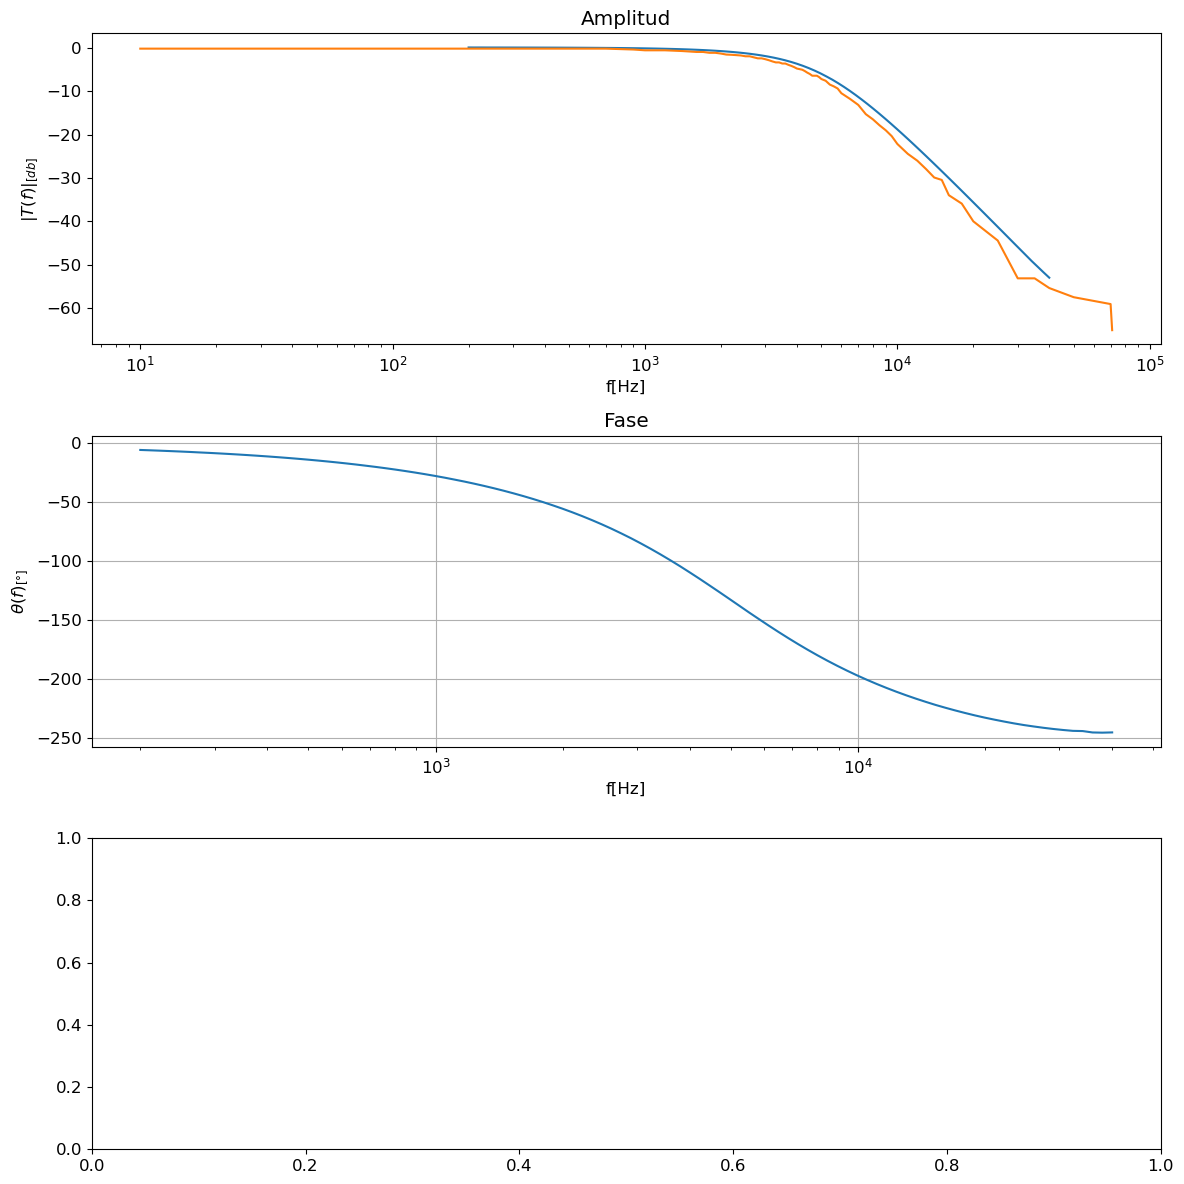

In [5]:
modelo = np.genfromtxt('Transferencia.csv',delimiter = ',')
x_frecuencia = modelo[: , 0]
y_frecuencia = modelo[: , 1]




modelo_medido = np.genfromtxt('Transferencia_medida.csv',delimiter = ',')
x_frecuencia_medida = modelo_medido[: , 0]
y_frecuencia_medida = modelo_medido[: , 1]

modelo_medido1 = np.genfromtxt('fase.csv',delimiter = ',')
x_frecuencia_medida1 = modelo_medido1[: , 0]
y_frecuencia_medida1 = modelo_medido1[: , 1]

display(Markdown('## Curvas de modulo y fase'))

mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['font.size'] = 12

figure, axes =plt.subplots(3,1)
axes[0].plot(x_frecuencia,y_frecuencia)
axes[0].grid()
axes[0].set_xscale('log')
axes[0].set_ylabel(r'$|T(f)|_{[db]}$')
axes[0].set_xlabel('f[Hz]')
axes[0].set_title('Amplitud')

axes[0].plot(x_frecuencia_medida,y_frecuencia_medida)
axes[0].set_xscale('log')
axes[0].grid()

axes[1].plot(x_frecuencia_medida1,y_frecuencia_medida1)
axes[1].set_xscale('log')
axes[1].grid()
axes[1].set_ylabel(r'$\theta (f)_{[°]}$')
axes[1].set_xlabel('f[Hz]')
axes[1].set_title('Fase')
figure.tight_layout()

En los graficos de arriba podemos ver las curvas de amplitud y fase.

#### Curva de Amplitud:

Las curvas en azul representan los valores tomados por el analizador y las curvas en amarillo representan lo valores de tranderencia medidas con el osciloscopio a diferentes frecuencias podemos observar que son muy similares y tienen la misma pendiente se ve al final de la de la curva amarilla unas irregualaridades debido a que se tomaron valores de frecuencias muy altas.

#### Curva de Fase:

En esta grafica solo podemos ver la curva azul del analizador, debido a que cuento se corroboraron los datos que se tomaron no eran los esperados asi que hay que volver a hacer la medidicion y tomaron los valores correctos y asi poder leventar la curva 

#### Curva de Desfasaje:

Esta grafica esta en blanco porque no se bajaron los datos del analizador y tampoco se tomaron los valores correctamente en el momento de la mediccion

## Imagenes tomadas del analizador

### Imagenes Amplitud
<img src="./Transferencia.jpeg" /> 

Aca podemos observar una atenuacion cercana a los 1dB en 2KHz como se pedia en el enunciado.


### Imagenes Fase
<img src="./fase.jpeg" /> 

En la imagen de la fase podemos ver un salto de fase de aproximadamente 360 debido a que el analizador no puede seguir dibujando y en la curva se arregla ese salto para poder dibujar bien la curva 

## Conclucion

Nos parecian raros los valores de la diferencia de fase entre la señal de entrada y la de salida cuando miravamos los valores que nos daba el osciloscopio porque siempe nos tiraba el mismo valor cuando modificavamos la frecuencia, pero visualmente podiamos ver con las 2 señales empezavan a separarse.

<img src="./fre_media.jpeg" align="right" width="400" />
<img src="./fre_baja.jpeg" align="left" width="400" />  
     

Podemos ver en las imagenes con las senal de salida se desplaza en el tiempo respecto de la señal de entrada.